# Time Series Feature Engineering for Temperature Forecasting

This notebook demonstrates **feature engineering techniques** for time series forecasting using the *Daily Minimum Temperatures* dataset from Melbourne, Australia.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')

In [ ]:
#@title Load Dataset
df = pd.read_csv('daily-minimum-temperatures-in-me.csv')
df['Date'] = pd.to_datetime(df['Date'])
df["Temp"] = pd.to_numeric(df["Temp"])

df.set_index('Date', inplace=True)

df = df.sort_index()

display(df.head())
print("Number of rows:", len(df))

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


Number of rows: 3650


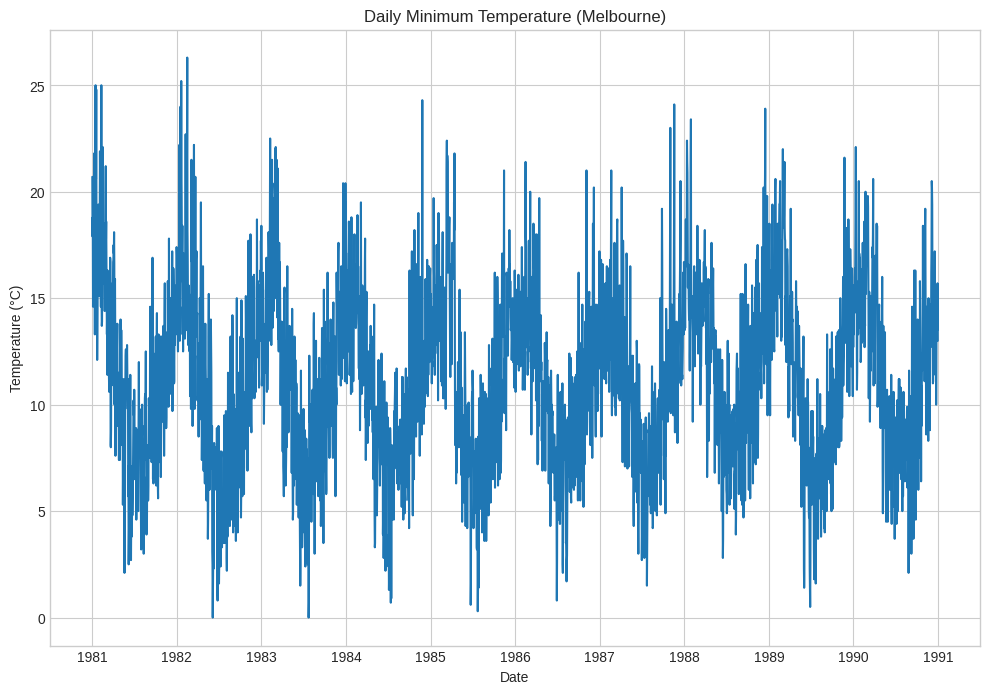

In [ ]:
dff = df.loc[(df.index >= '01-01-1981') & (df.index <= '12-31-1990')]
plt.figure(figsize=(12,8))
plt.plot(dff['Temp'])
plt.title('Daily Minimum Temperature (Melbourne)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

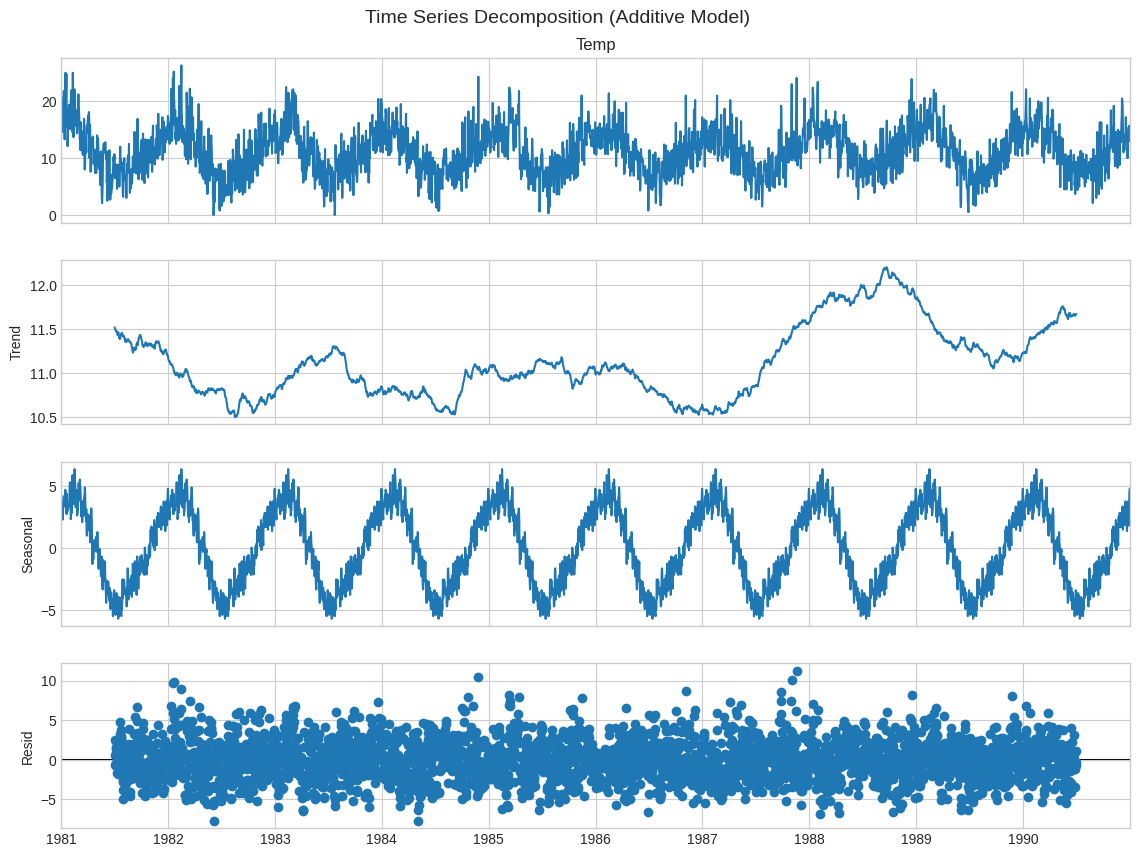

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Temp'], model='additive', period=365)

# --- Plot decomposition components ---
fig = decomposition.plot()
fig.set_size_inches(12, 9)
fig.suptitle("Time Series Decomposition (Additive Model)", fontsize=14)
plt.show()

## Create Lag Features
We create lag columns that represent the previous day’s temperature (lag 1), two days ago (lag 2), and three days ago (lag 3).

In [ ]:
#@title: Create Lag Features

n_lags = 7
for lag in range(1, n_lags + 1):
    df[f'Temp_lag{lag}'] = df['Temp'].shift(lag)

df_lagged = df.dropna().reset_index(drop=True)
df_lagged.head()


,Temp,Temp_lag1,Temp_lag2,Temp_lag3,Temp_lag4,Temp_lag5,Temp_lag6,Temp_lag7
0,17.4,15.8,15.8,15.8,14.6,18.8,17.9,20.7
1,21.8,17.4,15.8,15.8,15.8,14.6,18.8,17.9
2,20.0,21.8,17.4,15.8,15.8,15.8,14.6,18.8
3,16.2,20.0,21.8,17.4,15.8,15.8,15.8,14.6
4,13.3,16.2,20.0,21.8,17.4,15.8,15.8,15.8


## Rolling Window Statistics
They help ML models detect if the series is currently in a rising or falling phase

In [ ]:
df['rolling_mean_7'] = df['Temp'].rolling(7).mean() # Rolling Mean (Trend / moving average)
df['rolling_std_7']  = df['Temp'].rolling(7).std() # Rolling Std (Volatility)
df.head(10)

,Temp,Temp_lag1,Temp_lag2,Temp_lag3,Temp_lag4,Temp_lag5,Temp_lag6,Temp_lag7,rolling_mean_7,rolling_std_7
Date,,,,,,,,,,
1981-01-01,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-02,17.9,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-03,18.8,17.9,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-04,14.6,18.8,17.9,20.7,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-05,15.8,14.6,18.8,17.9,20.7,NaN,NaN,NaN,NaN,NaN
1981-01-06,15.8,15.8,14.6,18.8,17.9,20.7,NaN,NaN,NaN,NaN
1981-01-07,15.8,15.8,15.8,14.6,18.8,17.9,20.7,NaN,17.057143,2.152407
1981-01-08,17.4,15.8,15.8,15.8,14.6,18.8,17.9,20.7,16.585714,1.476966
1981-01-09,21.8,17.4,15.8,15.8,15.8,14.6,18.8,17.9,17.142857,2.462287


## Difference Features

In [ ]:
df['diff_1'] = df['Temp'].diff(1)
df['diff_7'] = df['Temp'] - df['Temp'].shift(7)
df.head(10)

,Temp,Temp_lag1,Temp_lag2,Temp_lag3,Temp_lag4,Temp_lag5,Temp_lag6,Temp_lag7,rolling_mean_7,rolling_std_7,diff_1,diff_7
Date,,,,,,,,,,,,
1981-01-01,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-02,17.9,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.8,NaN
1981-01-03,18.8,17.9,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,NaN
1981-01-04,14.6,18.8,17.9,20.7,NaN,NaN,NaN,NaN,NaN,NaN,-4.2,NaN
1981-01-05,15.8,14.6,18.8,17.9,20.7,NaN,NaN,NaN,NaN,NaN,1.2,NaN
1981-01-06,15.8,15.8,14.6,18.8,17.9,20.7,NaN,NaN,NaN,NaN,0.0,NaN
1981-01-07,15.8,15.8,15.8,14.6,18.8,17.9,20.7,NaN,17.057143,2.152407,0.0,NaN
1981-01-08,17.4,15.8,15.8,15.8,14.6,18.8,17.9,20.7,16.585714,1.476966,1.6,-3.3
1981-01-09,21.8,17.4,15.8,15.8,15.8,14.6,18.8,17.9,17.142857,2.462287,4.4,3.9


## Date-Time Features

In [ ]:
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df['dayofweek'] = df.index.dayofweek
df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)
df.head(10)

,Temp,Temp_lag1,Temp_lag2,Temp_lag3,Temp_lag4,Temp_lag5,Temp_lag6,Temp_lag7,rolling_mean_7,rolling_std_7,diff_1,diff_7,day,month,year,dayofweek,is_weekend
Date,,,,,,,,,,,,,,,,,
1981-01-01,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1981,3,0
1981-01-02,17.9,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.8,NaN,2,1,1981,4,0
1981-01-03,18.8,17.9,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,NaN,3,1,1981,5,1
1981-01-04,14.6,18.8,17.9,20.7,NaN,NaN,NaN,NaN,NaN,NaN,-4.2,NaN,4,1,1981,6,1
1981-01-05,15.8,14.6,18.8,17.9,20.7,NaN,NaN,NaN,NaN,NaN,1.2,NaN,5,1,1981,0,0
1981-01-06,15.8,15.8,14.6,18.8,17.9,20.7,NaN,NaN,NaN,NaN,0.0,NaN,6,1,1981,1,0
1981-01-07,15.8,15.8,15.8,14.6,18.8,17.9,20.7,NaN,17.057143,2.152407,0.0,NaN,7,1,1981,2,0
1981-01-08,17.4,15.8,15.8,15.8,14.6,18.8,17.9,20.7,16.585714,1.476966,1.6,-3.3,8,1,1981,3,0
1981-01-09,21.8,17.4,15.8,15.8,15.8,14.6,18.8,17.9,17.142857,2.462287,4.4,3.9,9,1,1981,4,0


## Rolling Lag Features

In [ ]:
df['rolling_mean_7_lag1'] = df['Temp'].shift(1).rolling(7).mean()
df['rolling_std_7_lag1'] = df['Temp'].shift(1).rolling(7).std()
df.head(10)

,Temp,Temp_lag1,Temp_lag2,Temp_lag3,Temp_lag4,Temp_lag5,Temp_lag6,Temp_lag7,rolling_mean_7,rolling_std_7,diff_1,diff_7,day,month,year,dayofweek,is_weekend,rolling_mean_7_lag1,rolling_std_7_lag1
Date,,,,,,,,,,,,,,,,,,,
1981-01-01,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1981,3,0,NaN,NaN
1981-01-02,17.9,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.8,NaN,2,1,1981,4,0,NaN,NaN
1981-01-03,18.8,17.9,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,NaN,3,1,1981,5,1,NaN,NaN
1981-01-04,14.6,18.8,17.9,20.7,NaN,NaN,NaN,NaN,NaN,NaN,-4.2,NaN,4,1,1981,6,1,NaN,NaN
1981-01-05,15.8,14.6,18.8,17.9,20.7,NaN,NaN,NaN,NaN,NaN,1.2,NaN,5,1,1981,0,0,NaN,NaN
1981-01-06,15.8,15.8,14.6,18.8,17.9,20.7,NaN,NaN,NaN,NaN,0.0,NaN,6,1,1981,1,0,NaN,NaN
1981-01-07,15.8,15.8,15.8,14.6,18.8,17.9,20.7,NaN,17.057143,2.152407,0.0,NaN,7,1,1981,2,0,NaN,NaN
1981-01-08,17.4,15.8,15.8,15.8,14.6,18.8,17.9,20.7,16.585714,1.476966,1.6,-3.3,8,1,1981,3,0,17.057143,2.152407
1981-01-09,21.8,17.4,15.8,15.8,15.8,14.6,18.8,17.9,17.142857,2.462287,4.4,3.9,9,1,1981,4,0,16.585714,1.476966


## Cyclic Encoding

In [ ]:
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['dow_sin'] = np.sin(2 * np.pi * df['dayofweek'] / 7)
df['dow_cos'] = np.cos(2 * np.pi * df['dayofweek'] / 7)
df[['month', 'month_sin', 'month_cos', 'dayofweek', 'dow_sin', 'dow_cos']].head(10)

,month,month_sin,month_cos,dayofweek,dow_sin,dow_cos
Date,,,,,,
1981-01-01,1,0.5,0.866025,3,0.433884,-0.900969
1981-01-02,1,0.5,0.866025,4,-0.433884,-0.900969
1981-01-03,1,0.5,0.866025,5,-0.974928,-0.222521
1981-01-04,1,0.5,0.866025,6,-0.781831,0.623490
1981-01-05,1,0.5,0.866025,0,0.000000,1.000000
1981-01-06,1,0.5,0.866025,1,0.781831,0.623490
1981-01-07,1,0.5,0.866025,2,0.974928,-0.222521
1981-01-08,1,0.5,0.866025,3,0.433884,-0.900969
1981-01-09,1,0.5,0.866025,4,-0.433884,-0.900969


## Fourier Series for Seasonality

In [ ]:
t = np.arange(len(df))
df['fourier_sin_365'] = np.sin(2 * np.pi * t / 365)
df['fourier_cos_365'] = np.cos(2 * np.pi * t / 365)

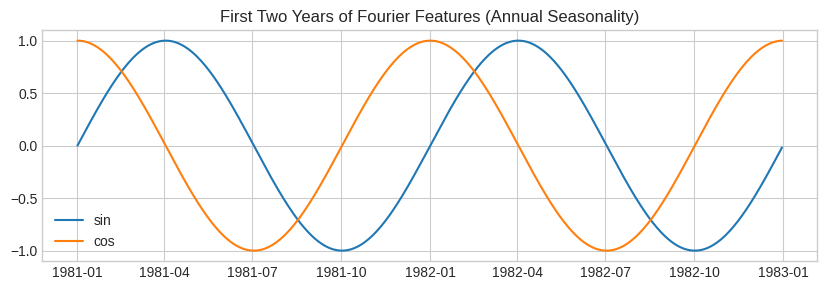

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(df['fourier_sin_365'][:730], label='sin')
plt.plot(df['fourier_cos_365'][:730], label='cos')
plt.title('First Two Years of Fourier Features (Annual Seasonality)')
plt.legend()
plt.show()

In [ ]:
np.arange(len(df))

array([   0,    1,    2, ..., 3647, 3648, 3649])

In [ ]:
df_final = df.dropna().copy()
df_final.to_csv('temperature_features.csv')
df_final.head()

,Temp,Temp_lag1,Temp_lag2,Temp_lag3,Temp_lag4,Temp_lag5,Temp_lag6,Temp_lag7,rolling_mean_7,rolling_std_7,...,dayofweek,is_weekend,rolling_mean_7_lag1,rolling_std_7_lag1,month_sin,month_cos,dow_sin,dow_cos,fourier_sin_365,fourier_cos_365
Date,,,,,,,,,,,,,,,,,,,,,
1981-01-08,17.4,15.8,15.8,15.8,14.6,18.8,17.9,20.7,16.585714,1.476966,...,3,0,17.057143,2.152407,0.5,0.866025,0.433884,-0.900969,0.120208,0.992749
1981-01-09,21.8,17.4,15.8,15.8,15.8,14.6,18.8,17.9,17.142857,2.462287,...,4,0,16.585714,1.476966,0.5,0.866025,-0.433884,-0.900969,0.137279,0.990532
1981-01-10,20.0,21.8,17.4,15.8,15.8,15.8,14.6,18.8,17.314286,2.632761,...,5,1,17.142857,2.462287,0.5,0.866025,-0.974928,-0.222521,0.154309,0.988023
1981-01-11,16.2,20.0,21.8,17.4,15.8,15.8,15.8,14.6,17.542857,2.418579,...,6,1,17.314286,2.632761,0.5,0.866025,-0.781831,0.623490,0.171293,0.985220
1981-01-12,13.3,16.2,20.0,21.8,17.4,15.8,15.8,15.8,17.185714,2.862649,...,0,0,17.542857,2.418579,0.5,0.866025,0.000000,1.000000,0.188227,0.982126


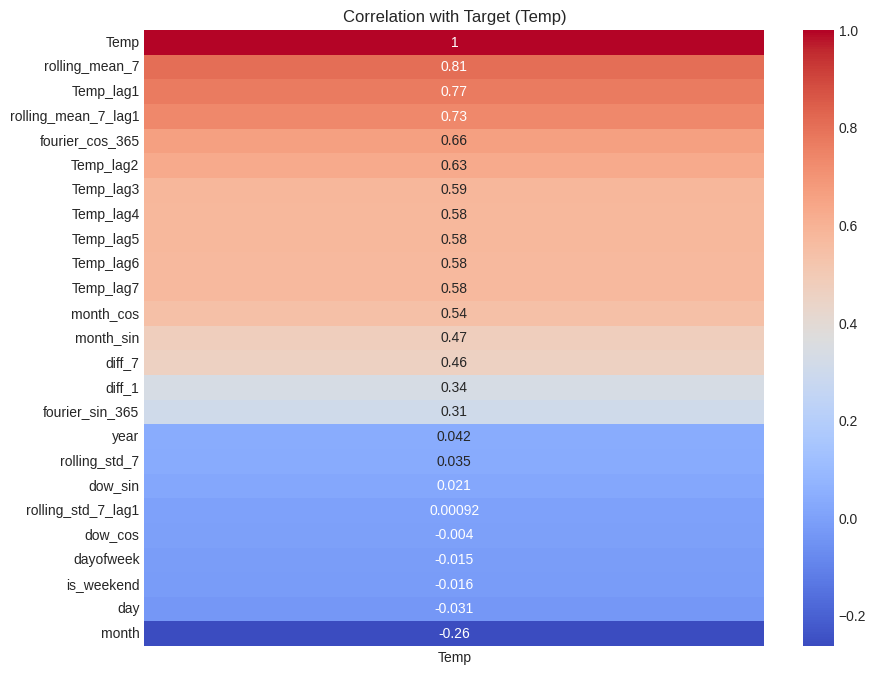

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_final.corr(numeric_only=True)['Temp'].sort_values(ascending=False).to_frame(), annot=True, cmap='coolwarm')
plt.title('Correlation with Target (Temp)')
plt.show()

## Train/Test Split

Chronological split:

In [ ]:
split_idx = int(len(df) * 0.8)
train_df = df.iloc[:split_idx]
test_df = df.iloc[split_idx:]

In [ ]:
feature_cols = [
 'rolling_mean_7', 'Temp_lag1', 'rolling_mean_7_lag1', 'fourier_cos_365', 'Temp_lag2','Temp_lag3']
X_train, X_test = train_df[feature_cols], test_df[feature_cols]
y_train, y_test = train_df['Temp'], test_df['Temp']

In [ ]:
#@title Train XGBoost Model
import time
import xgboost as xgb
from xgboost import XGBRegressor

start = time.time()
xgb = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6,
                   subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb.fit(X_train, y_train)
train_time_xgb = time.time() - start

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred_xgb = xgb.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f'RMSE: {rmse_xgb:.2f}')
print(f'MAE: {mae_xgb:.2f}')

RMSE: 1.62
MAE: 1.30


## Homework

Predict average of previous years, see if it's better than XGBoost